## ECE657A - DKMA Winter 2019
#### Homework 1
- In the cancer dataset report the mean, mode and skew, standard deviation and variance values for all the continuous valued features.

- In the cancer dataset select a few pairs of features for correlation by computing their PCC and report the resulting numbers and explain what they mean.

- In the cancer dataset plot two histograms for a continuous valued feature of your choice: One for patients with each diagnosis (M or B)

The Data source : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/ 

## Wisconsin Diagnostic Breast Cancer (WDBC) Data Information
Number of instances: 569 
Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant    

In [154]:
## import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
## load the data in pandas
wdbc_data = pd.read_csv('wdbc.data.txt', sep=",", header=None)
# config the attribute information
wdbc_data.columns = ["ID", "Diagnosis", 
                     "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
                     "compactness_mean", "concavity_mean", "concaveP_mean", "symmetry_mean", "fractalD_mean",
                     "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", 
                     "compactness_se", "concavity_se", "concaveP_se", "symmetry_se", "fractalD_se",
                     "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
                     "compactness_worst", "concavity_worst", "concaveP_worst", "symmetry_worst", "fractalD_worst"]

In [156]:
# quick look to data  (examine the data head)
wdbc_data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concaveP_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concaveP_worst,symmetry_worst,fractalD_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [157]:
# examine the data shape
wdbc_data.shape 

(569, 32)

### Task 1: report the mean, mode and skew, standard deviation and variance values for all the continuous valued features

- Mean: the mean for all the 30 features are concluded in the table below:

In [158]:
wdbc_data_mean = wdbc_data.iloc[:, 2:32].mean().to_frame()
wdbc_data_mean.columns = ["Mean Value"]
wdbc_data_mean

,Mean Value
radius_mean,14.127292
texture_mean,19.289649
perimeter_mean,91.969033
area_mean,654.889104
smoothness_mean,0.096360
compactness_mean,0.104341
concavity_mean,0.088799
concaveP_mean,0.048919
symmetry_mean,0.181162
fractalD_mean,0.062798


- Mode: the mode for all the 30 features are concluded in the table below:

In [159]:
wdbc_data_mode = wdbc_data.iloc[:, 2:32].mode(numeric_only=True)
wdbc_data_mode

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concaveP_mean,symmetry_mean,fractalD_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concaveP_worst,symmetry_worst,fractalD_worst
0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,...,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
1,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,...,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN
2,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,...,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN
3,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,...,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN
4,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,...,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN
5,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN
6,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN
7,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN
8,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN


Each feature may have multiple modes when the samples share the same frequency in the data set.

- Skew: the skew for all the 30 features are concluded in the table below:

In [160]:
wdbc_data_skew = wdbc_data.iloc[:, 2:32].skew().to_frame()
wdbc_data_skew.columns = ["Skew Value"]
wdbc_data_skew

,Skew Value
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concaveP_mean,1.171180
symmetry_mean,0.725609
fractalD_mean,1.304489


- Standard Deviation: the std for all the 30 features are concluded in the table below:

In [161]:
wdbc_data_std = wdbc_data.iloc[:, 2:32].std().to_frame()
wdbc_data_std.columns = ["Standard Deviation"]
wdbc_data_std

,Standard Deviation
radius_mean,3.524049
texture_mean,4.301036
perimeter_mean,24.298981
area_mean,351.914129
smoothness_mean,0.014064
compactness_mean,0.052813
concavity_mean,0.079720
concaveP_mean,0.038803
symmetry_mean,0.027414
fractalD_mean,0.007060


- Variance: the variance for all the 30 features are concluded in the table below:

In [162]:
wdbc_data_var = wdbc_data.iloc[:, 2:32].var().to_frame()
wdbc_data_var.columns = ["Variance"]
wdbc_data_var

,Variance
radius_mean,12.418920
texture_mean,18.498909
perimeter_mean,590.440480
area_mean,123843.554318
smoothness_mean,0.000198
compactness_mean,0.002789
concavity_mean,0.006355
concaveP_mean,0.001506
symmetry_mean,0.000752
fractalD_mean,0.000050


### Task 2: select a few pairs of features for correlation by computing their PCC and report the resulting numbers and explain what they mean

In [163]:
## define function for the pearson correlation coefficient calculation
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [164]:
print("The pcc for mean of radius  and concave points (number of concave portions of the contour) is : ", pearson_def(wdbc_data['radius_mean'].values, wdbc_data['concaveP_mean'].values))

print("The pcc for compactness mean and the standard deviation of fractal dimension is : ",  pearson_def(wdbc_data['compactness_mean'].values, wdbc_data['fractalD_se'].values))

print("The pcc for radius mean and the worst symmetry is : ", pearson_def(wdbc_data['radius_mean'].values, wdbc_data['symmetry_worst'].values))

print("The pcc for concavity mean and the standard deviation of the smoothness is : ", pearson_def(wdbc_data['concavity_mean'].values, wdbc_data['smoothness_se'].values))

The pcc for mean of radius  and concave points (number of concave portions of the contour) is :  0.8225285223871791
The pcc for compactness mean and the standard deviation of fractal dimension is :  0.5073181269004221
The pcc for radius mean and the worst symmetry is :  0.16395333493630726
The pcc for concavity mean and the standard deviation of the smoothness is :  0.0985637457991173


As we know from the definition of pearson correlation coefficient, when the result is close to 1, then it implies strong linear relationship.

The mean of radius and the concave points have a strong positive linear relationship where we expect to see when raius increase, the concave points would increase as well.

The compactnees mean and the standard deviation of fractal dimension has relative weak linear correlation. Similarly, the correlation between the radius mean and the worst symmetry is weaker since its close to 0.

The last pair I selected is concavity mean and the standard deviation of the smoothness, we can observe that the pcc is close to 0, which implies no linear correlation.

### Task 3: In the cancer dataset plot two histograms for a continuous valued feature of your choice: One for patients with each diagnosis (M or B)

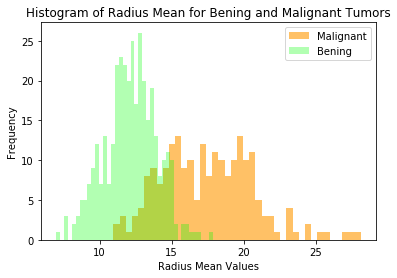

In [165]:
m = plt.hist(wdbc_data[wdbc_data["Diagnosis"] == "M"].radius_mean,bins=40,fc = (1,0.6,0,0.6),label = "Malignant")
b = plt.hist(wdbc_data[wdbc_data["Diagnosis"] == "B"].radius_mean,bins=40,fc = (0,1,0,0.3),label = "Bening")

plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

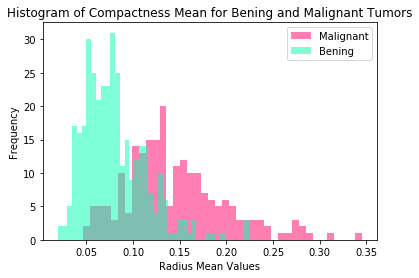

In [166]:
m = plt.hist(wdbc_data[wdbc_data["Diagnosis"] == "M"].compactness_mean,bins=40,fc = (1,0,0.4,0.5),label = "Malignant")
b = plt.hist(wdbc_data[wdbc_data["Diagnosis"] == "B"].compactness_mean,bins=40,fc = (0,1,0.7,0.5),label = "Bening")

plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Compactness Mean for Bening and Malignant Tumors")
plt.show()